In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [79]:
dataset = pd.read_csv('./data/indian_liver_patient.csv')
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


from the above we can see that 'Albumin_and_Globulin_Ratio' prpoerty have some value missing

In [81]:
# fill the missing values with mean of the coressponding column
dataset['Albumin_and_Globulin_Ratio'] = dataset.Albumin_and_Globulin_Ratio.fillna(value = dataset['Albumin_and_Globulin_Ratio'].mean())

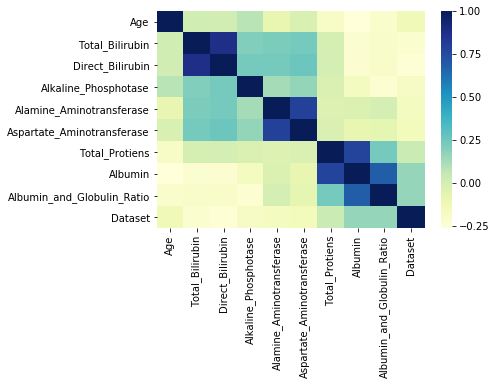

In [82]:
# let's build a correlation matrix and use seaborn to plot the heatmap of these
# correlation matrix
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix,cmap="YlGnBu")
# from the heatmap, dark shades represent positive correlation and light shades represent negative correlation

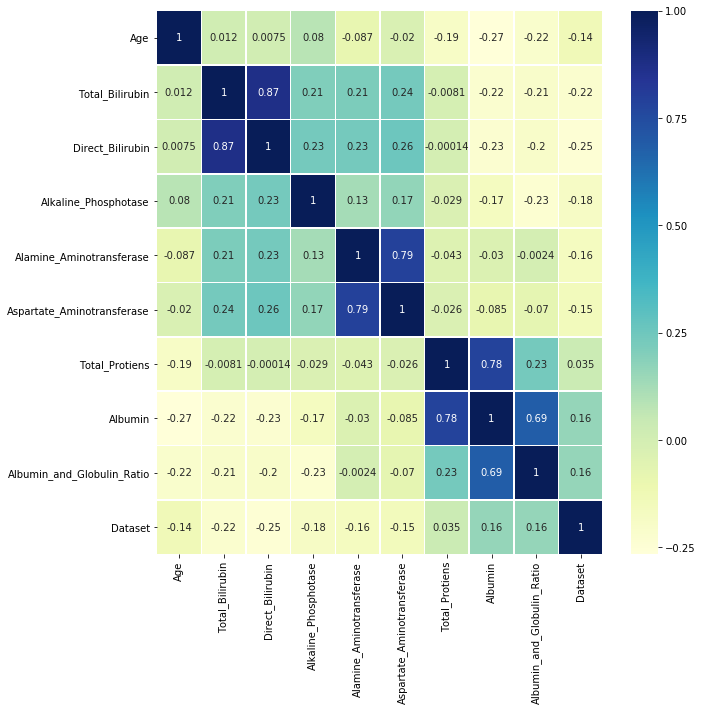

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="YlGnBu", annot=True, linewidths=.5, ax = ax)

from the above heatmap following independent varaibles are highly correlated
1. Total_Bilirubin &  Direct_Bilirubin
2. Alamine_Aminotransferase & Aspartate_Aminotransferase
3. Total_Proteins & Albumin
4. Albumin & Albumin_and_Globulin_Ratio

In [84]:
# classifying data into independent and dependent variable
X = dataset.drop(['Dataset'],axis = 1).values
y = dataset['Dataset'].values

In [85]:
# encoding the categorical data of Gender varaible
labelencoder = LabelEncoder()
X[:,1] = labelencoder.fit_transform(X[:,1])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

In [86]:
# avoid dummy varaible trap
X = X[:,1:]

In [87]:
# creating test and training set data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [88]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train,y_train)
y_pred = rf_classifier.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)
rf_cr = classification_report(y_test, y_pred)
print("Accuracy Score in percentage : \n",round(accuracy_score(y_test,y_pred) * 100,2))
print("Random Forrest Confusion Matrix : \n",rf_cm)
print("Random Forrest Classification Report : \n",rf_cr)

Accuracy Score in percentage : 
 71.79
Random Forrest Confusion Matrix : 
 [[71  7]
 [26 13]]
Random Forrest Classification Report : 
              precision    recall  f1-score   support

          1       0.73      0.91      0.81        78
          2       0.65      0.33      0.44        39

avg / total       0.70      0.72      0.69       117



from the classification report, random forrest classifier is 71% accurate

In [90]:
# let's remove the highly correlated params and apply random forrest see whether the precision improves
# classifying data into independent and dependent variable
X_dropped = dataset.drop(['Dataset','Direct_Bilirubin','Aspartate_Aminotransferase','Albumin'],axis = 1).values
y_dropped = dataset['Dataset'].values

# encoding the categorical data of Gender varaible
labelencoder = LabelEncoder()
X_dropped[:,1] = labelencoder.fit_transform(X_dropped[:,1])
onehotencoder = OneHotEncoder(categorical_features = [1])
X_dropped = onehotencoder.fit_transform(X_dropped).toarray()

# avoid dummy varaible trap
X_dropped = X_dropped[:,1:]

# creating test and training set data
X_train_dropped,X_test_dropped,y_train_dropped,y_test_dropped = train_test_split(X_dropped, y_dropped, test_size = 0.2, random_state = 0)

# feature scaling
sc = StandardScaler()
X_train_dropped = sc.fit_transform(X_train_dropped)
X_test_dropped = sc.transform(X_test_dropped)

In [91]:
rf_classifier_dropped = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier_dropped.fit(X_train_dropped,y_train_dropped)
y_pred_dropped = rf_classifier_dropped.predict(X_test_dropped)
rf_cm_dropped = confusion_matrix(y_test_dropped, y_pred_dropped)
rf_cr_dropped = classification_report(y_test_dropped, y_pred_dropped)
print("Accuracy Score in percentage : \n",round(accuracy_score(y_test_dropped,y_pred_dropped) * 100,2))
print("Random Forrest Confusion Matrix : \n",rf_cm_dropped)
print("Random Forrest Classification Report : \n",rf_cr_dropped)

Accuracy Score in percentage : 
 62.39
Random Forrest Confusion Matrix : 
 [[66 12]
 [32  7]]
Random Forrest Classification Report : 
              precision    recall  f1-score   support

          1       0.67      0.85      0.75        78
          2       0.37      0.18      0.24        39

avg / total       0.57      0.62      0.58       117



after removing the correlated variables, accuracy decreased to 62% from 71%

In [92]:
# let's create Naive Bayes model and fit the dataset
classifier_NB = GaussianNB()
classifier_NB.fit(X_train,y_train)
y_pred = classifier_NB.predict(X_test)
gnb_cm = confusion_matrix(y_test, y_pred)
gnb_cr = classification_report(y_test, y_pred)
print("Accuracy Score in percentage : \n",round(accuracy_score(y_test,y_pred) * 100,2))
print("Naive Bayes Confusion Matrix : \n",gnb_cm)
print("Naive Bayes Classification Report : \n",gnb_cr)

Accuracy Score in percentage : 
 60.68
Naive Bayes Confusion Matrix : 
 [[32 46]
 [ 0 39]]
Naive Bayes Classification Report : 
              precision    recall  f1-score   support

          1       1.00      0.41      0.58        78
          2       0.46      1.00      0.63        39

avg / total       0.82      0.61      0.60       117



from the Naive Bayes model, accuracy is at 60%

In [93]:
# applying logistic regression model to training set
# here we are considering dropped varaibles which are correlated
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train_dropped,y_train_dropped)
y_pred_dropped = classifier_logistic.predict(X_test_dropped)
log_cm = confusion_matrix(y_test_dropped, y_pred_dropped)
log_cr = classification_report(y_test_dropped, y_pred_dropped)
print("Accuracy Score in percentage : \n",round(accuracy_score(y_test_dropped,y_pred_dropped) * 100,2))
print("Logistic Regression Confusion Matrix : \n",log_cm)
print("Logistic Regression Classification Report : \n",log_cr)


Accuracy Score in percentage : 
 68.38
Logistic Regression Confusion Matrix : 
 [[74  4]
 [33  6]]
Logistic Regression Classification Report : 
              precision    recall  f1-score   support

          1       0.69      0.95      0.80        78
          2       0.60      0.15      0.24        39

avg / total       0.66      0.68      0.61       117



accuracy of logistic regression is 68%